In [209]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/company-bankruptcy-prediction/data.csv


In [210]:
data = pd.read_csv('/kaggle/input/company-bankruptcy-prediction/data.csv')
data.shape

(6819, 96)

In [211]:
data_copy = data.copy()
data_copy.isnull().sum()
# No missing values

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 96, dtype: int64

# **Handling categorical variables**

**For column 85 Liability-Assets Flag: 1 if Total Liability exceeds Total Assets, 0 otherwise**

**For column 94 Net Income Flag: 1 if Net Income is Negative for the last two years, 0 otherwise**

In [212]:
print(data_copy.iloc[:, 85].unique()) 
print(data_copy.iloc[:, 94].unique())

[0 1]
[1]


In [213]:
print(data_copy.iloc[:, 85].value_counts(normalize=True))
print(data_copy["Bankrupt?"].value_counts(normalize=True))

 Liability-Assets Flag
0    0.998827
1    0.001173
Name: proportion, dtype: float64
Bankrupt?
0    0.967737
1    0.032263
Name: proportion, dtype: float64


In [214]:
data_copy.groupby("Bankrupt?")[" Liability-Assets Flag"].value_counts(normalize=True).unstack()

Liability-Assets Flag,0,1
Bankrupt?,,
0,0.999697,0.000303
1,0.972727,0.027273


**Comment: Since the values for feature "Net Income Flag" are all 1, it doesn't help with our prediction model. For feature "Liability-Assets Flag", almost all companies are with value "0". It also contributes little help to our model.Therefore, we drop features "Net Income Flag" and "Liability-Assets Flag.**

In [215]:
data_copy= data_copy.drop([" Liability-Assets Flag"," Net Income Flag"], axis=1, inplace=False)

In [216]:
data_copy.shape
# 93 features left

(6819, 94)

# **Manipulating data**

In [217]:
# Upsampling the samples
minority = data[data[data.columns[0]]==1]
num_features = minority.shape[1]
size = abs(data[data[data.columns[0]]==1][data.columns[0]].count()-data[data[data.columns[0]]==0][data.columns[0]].count())
feature = data
mean = np.mean(minority, axis=0)
std_dev = np.std(minority, axis=0)
new_samples = np.random.normal(mean, std_dev, (size, num_features))
df = pd.DataFrame(new_samples, columns=[f'{i}' for i in feature])
new_data = pd.concat([data, df], ignore_index=True)
new_data.describe()
D = new_data.copy()

In [218]:
# Drop the two amentioned features
new_data = new_data.drop([" Liability-Assets Flag"," Net Income Flag"], axis=1, inplace=False)

In [219]:
# Display the class distribution (50:50)
new_data[new_data.columns[0]].value_counts()

Bankrupt?
1.0    6599
0.0    6599
Name: count, dtype: int64

# **Standardization**

In [220]:
# Define attributes and target variable
X = new_data[new_data.columns[1:]]
y = new_data["Bankrupt?"]

In [221]:
X

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Current Liability to Current Assets,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability
0,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,...,0.118250,0.716845,9.219440e-03,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,0.016469
1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,...,0.047775,0.795297,8.323302e-03,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,0.020794
2,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,0.780284,...,0.025346,0.774670,4.000285e-02,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,0.016474
3,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,0.781241,...,0.067250,0.739555,3.252475e-03,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,0.023982
4,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,0.781550,...,0.047725,0.795016,3.877563e-03,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,0.035490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13193,0.486109,0.251743,0.471414,0.596526,0.613758,0.998984,0.793548,0.805116,0.302786,0.777902,...,0.116772,0.828403,1.119706e+09,0.625628,0.609991,0.802342,0.313333,0.019241,0.556961,-0.009950
13194,0.339735,0.475734,0.309664,0.599395,0.584415,0.998850,0.794818,0.807542,0.304660,0.782314,...,0.111830,0.744886,-4.699276e+08,0.628081,0.615490,0.688098,0.270490,0.033256,0.562237,-0.006974
13195,0.441701,0.532134,0.556857,0.573061,0.593217,1.000611,0.796748,0.801213,0.305872,0.778502,...,0.013435,0.710677,1.425515e+09,0.636403,0.600812,0.863226,0.333055,0.040094,0.573524,0.022691
13196,0.383561,0.274699,0.530501,0.574791,0.605614,0.998492,0.796457,0.808512,0.306997,0.779283,...,0.027938,0.768465,5.780573e+07,0.630682,0.610818,0.868462,0.200004,0.057038,0.570580,0.011157


In [222]:
# Apply z-score normalization
from sklearn import preprocessing
zscore_scaler = preprocessing.StandardScaler().fit(X)
X = pd.DataFrame(zscore_scaler.transform(X), columns = X.columns)
X


,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Current Liability to Current Assets,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability
0,-1.109579,-0.827249,-1.152237,-0.121388,-0.130453,0.023423,-0.000797,0.006127,-0.055621,-0.010823,...,1.712211,-0.785008,-0.089573,-0.086027,-0.118428,-0.102892,0.068546,-0.088866,-0.112831,-0.380530
1,0.007626,0.287197,0.082570,0.408840,0.402355,0.020943,0.051035,0.054288,0.047972,0.044816,...,0.040495,0.300238,-0.089573,-0.007970,0.410267,0.120753,-0.058886,14.743518,0.478196,-0.298574
2,-0.448091,-0.096561,-0.411829,-0.121823,-0.136140,0.011478,-0.051655,-0.035220,-0.125206,-0.085658,...,-0.491530,0.014893,-0.089573,0.011151,-0.118666,0.061598,0.068278,-0.091728,-0.146030,-0.380428
3,-0.760815,-0.564116,-0.573849,-1.203609,-1.217942,-0.005354,0.007594,0.021441,0.024419,0.016524,...,0.502439,-0.470866,-0.089573,-0.081002,-1.196838,0.023138,-0.101486,-0.082883,-0.053649,-0.238171
4,0.016345,0.289332,0.144519,-0.282894,-0.292745,0.023843,0.049552,0.054582,0.038700,0.049521,...,0.039311,0.296348,-0.089573,-0.021206,-0.279252,0.120817,-0.165792,-0.204096,1.003302,-0.020133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13193,0.267771,-2.517615,-0.421638,-0.419287,0.616208,0.024957,-0.351814,-0.355901,-0.039758,-0.339936,...,1.677133,0.758205,1.623185,0.191634,0.395506,-0.575929,0.532305,-0.547550,-0.796873,-0.881080
13194,-1.477538,-0.324537,-2.221323,-0.245930,-1.164893,0.010703,-0.218321,-0.118117,0.173609,0.131052,...,1.559911,-0.397116,-0.808398,0.439401,0.726511,-2.691166,-0.326671,0.325971,-0.287822,-0.824690
13195,-0.261728,0.227665,0.529041,-1.836677,-0.630624,0.198733,-0.015381,-0.738452,0.311591,-0.275900,...,-0.774085,-0.870342,2.090967,1.280010,-0.157037,0.551363,0.927729,0.752149,0.801362,-0.262639
13196,-0.954974,-2.292855,0.235796,-1.732150,0.121869,-0.027579,-0.045988,-0.023010,0.439614,-0.192481,...,-0.430055,-0.070942,-0.001151,0.702114,0.445265,0.648300,-1.739858,1.808213,0.517276,-0.481175


# **Build our first simple model**

In [223]:
# Split the data to train and test set
from sklearn.model_selection import train_test_split
# split train data into train and test, 70% in training and 30% in testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)
y_train =np.array(y_train)
X_train = np.array(X_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [224]:
# Use Logistic Regression Model
from sklearn.linear_model import LogisticRegression
Logistic_model = LogisticRegression(penalty='l1', C=0.3, random_state=42, solver='liblinear')
Logistic_model.fit(X_train,y_train)
y_pre = Logistic_model.predict(X_train)

In [225]:
# Evaluate our first-built model
from sklearn.metrics import accuracy_score
accuracy_score(y_train, y_pre, normalize=True)

0.9428447715955834

              precision    recall  f1-score   support

         0.0       0.96      0.92      0.94      2005
         1.0       0.93      0.96      0.94      1955

    accuracy                           0.94      3960
   macro avg       0.94      0.94      0.94      3960
weighted avg       0.94      0.94      0.94      3960



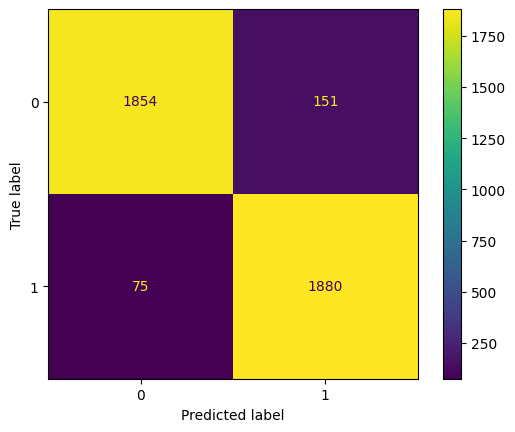

In [226]:
y_pred = Logistic_model.predict(X_test)
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

# **Try dropping different features and test the new model**

In [227]:
feature = new_data.columns[1:]

In [228]:
# Find out the variables with coefficient = 0
coefficients = Logistic_model.coef_
cof=[]
for i, coef in enumerate(coefficients):
    print(f'feature {i}: {coef}')
unimportant_feature = feature[coefficients[0]==0]
print(unimportant_feature)

feature 0: [-0.3330753  -0.3480678  -0.32348632 -0.04139357  0.          1.6437177
 -0.28151839 -0.18087232 -0.19014052 -0.22783775  0.02715936 -0.01712373
  0.         -0.06006905 -0.04454184 -0.30057648 -0.37525673 -0.29916822
 -0.50917386 -0.08570409  0.         -0.13864039 -0.53456857 -0.01266879
 -0.09079885  0.0033887  -0.01523623  0.04303245 -0.10074258  0.0351156
 -0.94005287  0.04179017  0.          0.         -0.02173869  0.09242252
  0.65689274 -0.65051943  0.08571105  0.16011808  0.01736869 -0.1665113
 -0.54892234  0.04045258 -0.20143109 -0.24414423 -0.4262232  -0.05019346
  0.07540999 -0.05301068  0.0385397  -0.0862689  -0.00635915 -0.25343886
 -0.11689203 -0.00934029 -0.51182169 -0.19925278  0.12288838  0.44221079
  0.          0.          0.         -0.03750343 -0.13488288  0.03625325
  0.00548756 -0.18519202  0.          0.20768122  0.01034553  0.00945653
 -0.02249478 -0.1732693   0.          0.04030836 -0.08216492  0.11510683
  0.11432806 -0.12302842 -0.05444446 -0.045

We try to drop features "Continuous interest rate (after tax)","Research and development expense rate", " Revenue Per Share (Yuan ¥)",
       " Regular Net Profit Growth Rate", "Cash Reinvestment %",
       ' Current Ratio', ' Allocation rate per person',
       ' Total income/Total expense'

In [229]:
data_refine = D.copy()


In [231]:
# Drop those features
new_data = data_refine.drop([unimportant_feature[0]," Liability-Assets Flag"," Net Income Flag"], axis=1, inplace=False)

In [251]:
X = new_data[new_data.columns[1:]]
y = new_data["Bankrupt?"]
zscore_scaler = preprocessing.StandardScaler().fit(X)
X = pd.DataFrame(zscore_scaler.transform(X), columns = X.columns)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)
y_train =np.array(y_train)
X_train = np.array(X_train)
X_test = np.array(X_test)
y_test = np.array(y_test)
Logistic_model = LogisticRegression(penalty='l2', C=0.3, random_state=42, solver='liblinear')
Logistic_model.fit(X_train,y_train)
y_pre = Logistic_model.predict(X_train)

In [252]:
# Test our new data
accuracy_score(y_train, y_pre, normalize=True)

0.9427365230569388

              precision    recall  f1-score   support

         0.0       0.96      0.92      0.94      2005
         1.0       0.93      0.96      0.94      1955

    accuracy                           0.94      3960
   macro avg       0.94      0.94      0.94      3960
weighted avg       0.94      0.94      0.94      3960



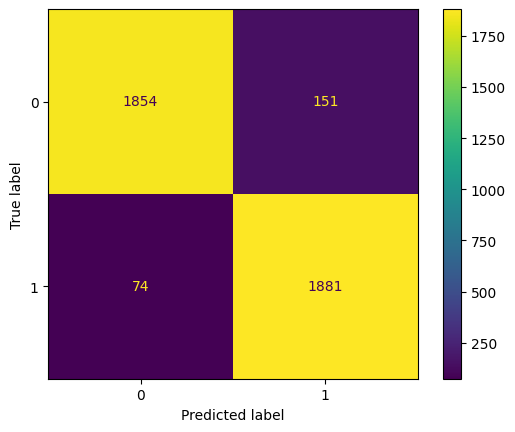

In [253]:
y_pred = Logistic_model.predict(X_test)
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

# *Naive_bayes part*

In [255]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.model_selection import *
from sklearn.feature_selection import *
from sklearn.metrics import *
from sklearn.preprocessing import *
from sklearn.ensemble import *
from sklearn.decomposition import PCA
from sklearn.naive_bayes import BernoulliNB
X = new_data[new_data.columns[1:]]
y = new_data["Bankrupt?"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)


In [256]:
from sklearn.model_selection import train_test_split

# to obtain the mutual information values
from sklearn.feature_selection import mutual_info_classif
# to select the features
from sklearn.feature_selection import SelectKBest

# determine mutural information

In [257]:
mi = mutual_info_classif(X_train, y_train)
mi


array([0.20934566, 0.21777149, 0.21017004, 0.11506024, 0.29377153,
       0.41792424, 0.47091509, 0.4792217 , 0.43300383, 0.40308361,
       0.44978745, 0.07540512, 0.60847456, 0.2625058 , 0.26285775,
       0.27068459, 0.25759038, 0.34431888, 0.24285081, 0.08190472,
       0.36960815, 0.34312598, 0.47026181, 0.47357416, 0.44286693,
       0.45038124, 0.49718611, 0.36731711, 0.61572971, 0.1742849 ,
       0.22800059, 0.10210639, 0.61598136, 0.4268099 , 0.62006982,
       0.20569662, 0.18594177, 0.48618846, 0.5020992 , 0.57677127,
       0.1748012 , 0.23419296, 0.36999123, 0.50254706, 0.6160031 ,
       0.61649166, 0.42584369, 0.56448698, 0.36089424, 0.6176777 ,
       0.17823694, 0.61995778, 0.12714202, 0.03595767, 0.02435263,
       0.14414062, 0.02505841, 0.61696784, 0.13261096, 0.09152396,
       0.34495971, 0.60602831, 0.07317608, 0.47501726, 0.49549222,
       0.60118503, 0.23345787, 0.23509388, 0.2190217 , 0.49763314,
       0.37103585, 0.46701947, 0.30439046, 0.13550196, 0.62104

Text(0, 0.5, 'Mutual Information')

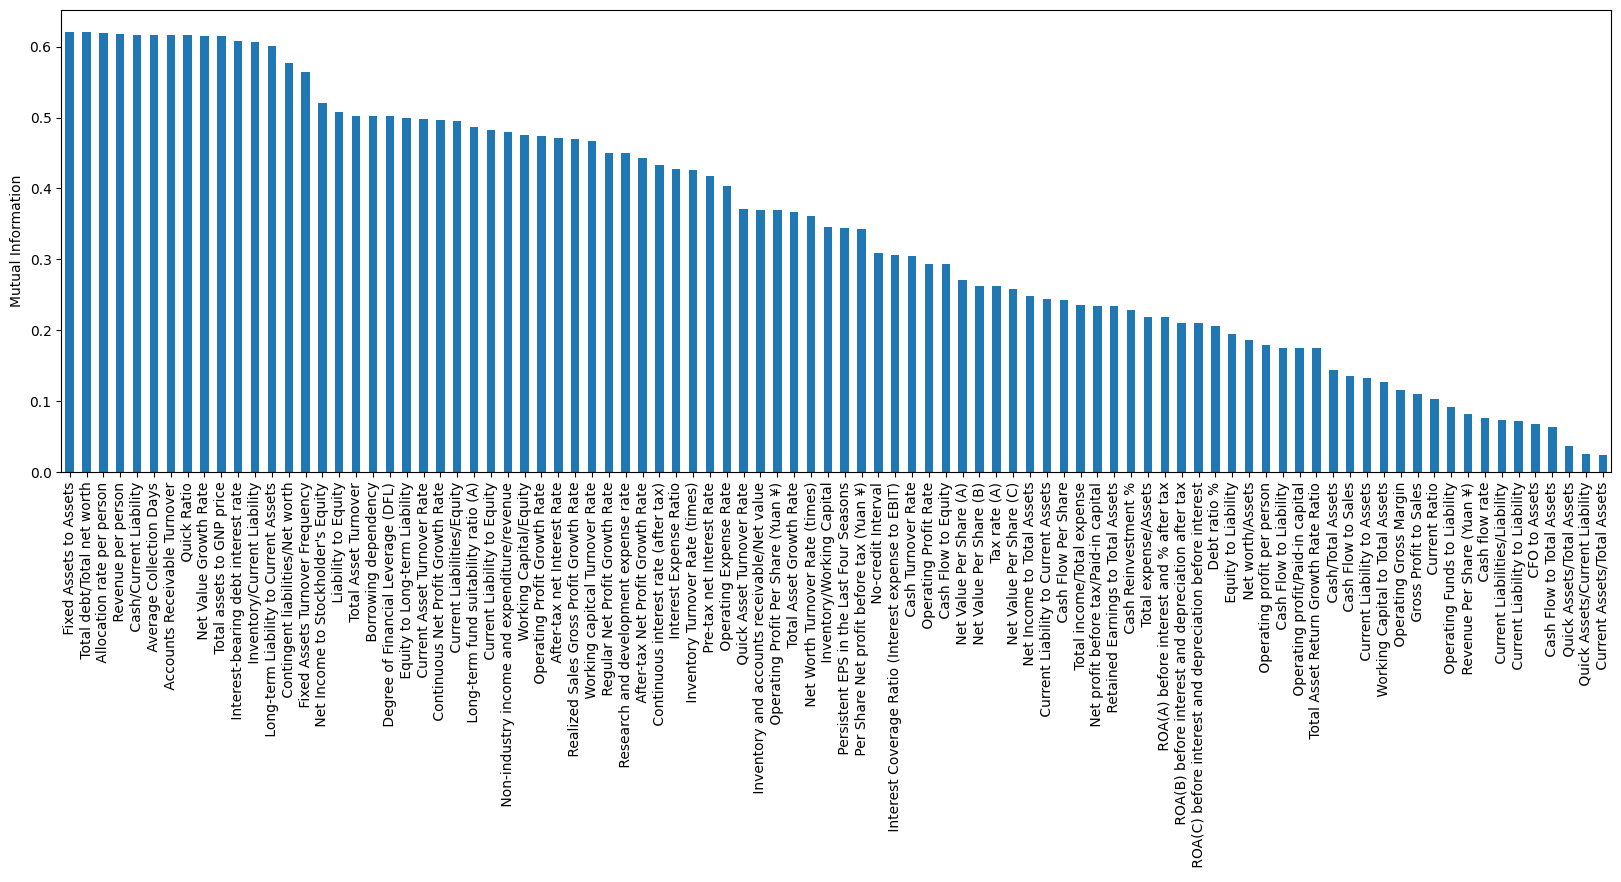

In [258]:
mi = pd.Series(mi)
#easier deal with DataFrame
X_train = pd.DataFrame(X_train)
mi.index = X_train.columns
mi.sort_values(ascending=False).plot.bar(figsize=(20, 6))
plt.ylabel('Mutual Information')


In [259]:
# select features
sel_ = SelectKBest(mutual_info_classif, k=10).fit(X_train, y_train)
#k=10 is the best hyperpara

# display features
X_train.columns[sel_.get_support()]

Index([' Net Value Growth Rate', ' Quick Ratio', ' Total debt/Total net worth',
       ' Accounts Receivable Turnover', ' Average Collection Days',
       ' Revenue per person', ' Allocation rate per person',
       ' Cash/Current Liability', ' Fixed Assets to Assets',
       ' Total assets to GNP price'],
      dtype='object')

In [260]:
# to remove the rest of the features:
X_train1 = X_train.copy()
X_test1 = X_test.copy()
X_train1 = sel_.transform(X_train)
X_test1 = sel_.transform(X_test)
X_train1.shape,X_test1.shape

((9238, 10), (3960, 10))

classification model- Naive Bayes on training set

In [261]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train1, y_train)

GaussianNB()

In [262]:
y_pred = classifier.predict(X_test1)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1983   22]
 [  57 1898]]


In [263]:
acc2 = accuracy_score(y_test, y_pred)
print(f"Accuracy score : {acc2}")

Accuracy score : 0.9800505050505051


              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98      2005
         1.0       0.99      0.97      0.98      1955

    accuracy                           0.98      3960
   macro avg       0.98      0.98      0.98      3960
weighted avg       0.98      0.98      0.98      3960



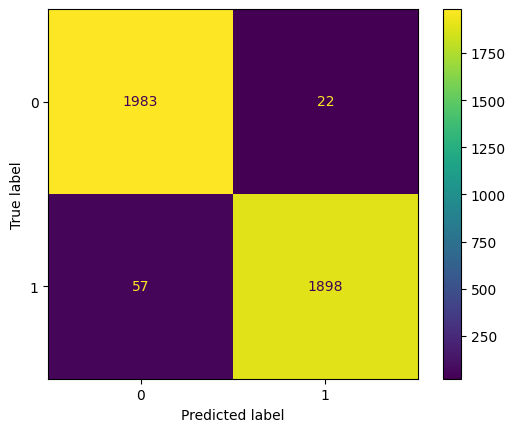

In [264]:
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

# NeuralNetwork

In [265]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

In [266]:
model = Sequential()
model.add(tf.keras.layers.InputLayer(shape = (X_train.shape[1],)))
model.add(tf.keras.layers.Dense(512, activation='tanh'))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(256, activation='tanh'))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(128, activation='tanh'))
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                │ (None, 512)            │        47,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 211,969 (828.00 KB)

 Trainable params: 211,969 (828.00 KB)

 Non-trainable params: 0 (0.00 B)

In [267]:
X = new_data[new_data.columns[1:]]
y = new_data["Bankrupt?"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

Epoch 1/50
289/289 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - loss: 0.6388 - val_loss: 0.3587
Epoch 2/50
289/289 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4232 - val_loss: 0.2888
Epoch 3/50
289/289 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3396 - val_loss: 0.2587
Epoch 4/50
289/289 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2955 - val_loss: 0.2283
Epoch 5/50
289/289 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2672 - val_loss: 0.2342
Epoch 6/50
289/289 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2479 - val_loss: 0.1904
Epoch 7/50
289/289 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2421 - val_loss: 0.2013
Epoch 8/50
289/289 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2319 - val_loss: 0.1865
Epoch 9/50
289/289 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2218 - val_loss: 0.2316
Epoch 10/50
289/289 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2234 - val_loss: 0.2017
Epoch 11/50
289/289 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2214 - val_loss: 0.1837
Epoch 12/50
289/289 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/ste

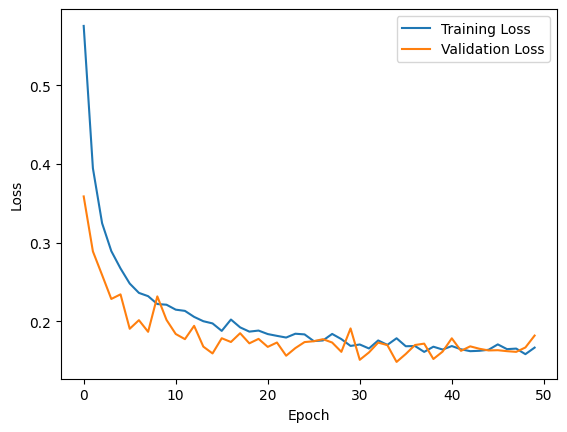

In [268]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy')

# Train the model
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

# Plot the loss and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

         0.0       0.90      0.99      0.94      2005
         1.0       0.99      0.88      0.93      1955

    accuracy                           0.94      3960
   macro avg       0.94      0.94      0.94      3960
weighted avg       0.94      0.94      0.94      3960



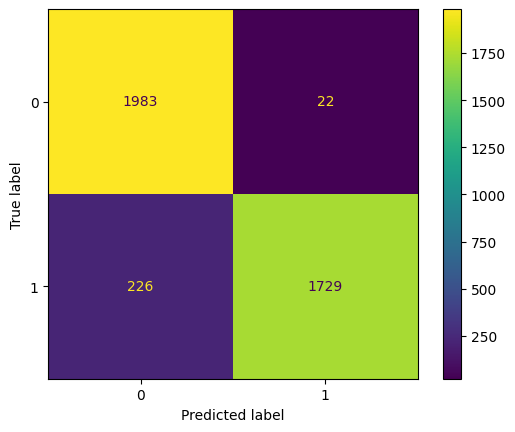

In [269]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
y_pred = model.predict(X_test)
# Convert the predicted probabilities to binary labels (0 or 1)
y_pred_binary = (y_pred > 0.5).astype(int)
print(classification_report(y_test, y_pred_binary))
cm = confusion_matrix(y_test, y_pred_binary)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

# Random Forest

In [270]:
#after grid_search
rfCla = RandomForestClassifier(n_estimators=472,
                               max_depth=8,
                               random_state=42)
rfCla.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, n_estimators=472, random_state=42)

In [271]:
y_pred = rfCla.predict(X_test)


              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      2005
         1.0       1.00      0.97      0.99      1955

    accuracy                           0.99      3960
   macro avg       0.99      0.99      0.99      3960
weighted avg       0.99      0.99      0.99      3960



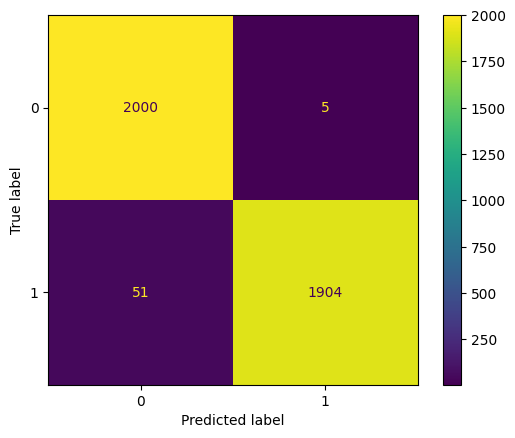

In [272]:
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();